In [2]:
cd /SMART_101

/SMART_101


In [4]:
import os
import json
import torch

path1 = os.path.join('V_COT_output','GPT_aug','GPT_augmented_101000', 'gpt_augmentation_result_1_4.json')
path2 = os.path.join('V_COT_output','GPT_aug','GPT_augmented_101000', 'gpt_augmentation_result_2_4.json')
path3 = os.path.join('V_COT_output','GPT_aug','GPT_augmented_101000', 'gpt_augmentation_result_3_4.json')
path4 = os.path.join('V_COT_output','GPT_aug','GPT_augmented_101000', 'gpt_augmentation_result_4_4.json')
path5 = os.path.join('V_COT_output','GPT_aug','GPT_augmented_101000', 'gpt_augmentation_result_5_4.json')

gpt_aug_total = dict()
with open(path1) as f1:
    json1 = json.load(f1)
    print(len(json1))
    gpt_aug_total.update(json1)
with open(path2) as f2:
    json2 = json.load(f2)
    print(len(json2))
    gpt_aug_total.update(json2)
with open(path3) as f3:
    json3 = json.load(f3)
    print(len(json3))
    gpt_aug_total.update(json3)
with open(path4) as f4:
    json4 = json.load(f4)
    gpt_aug_total.update(json4)
    print(len(json4))
with open(path5) as f5:
    json5 = json.load(f5)
    print(len(json5))
    gpt_aug_total.update(json5)
with open('gpt_aug_total.json', 'w') as new_file:
    json.dump(gpt_aug_total, new_file)
    print(len(gpt_aug_total))

25986
25982
25985
22983
64
101000


In [5]:
keys = list(gpt_aug_total.keys())
max_key, max_len = '', 0
upper_1000_list, upper_1000_cnt = [], 0
for key in keys:
    loop = len(gpt_aug_total[key]['GT_with_Rationale'])
    if max_len < loop:
        max_len=loop
        max_key=key
    if (loop > 1000):
        upper_1000_cnt += 1
        upper_1000_list.append(key)
print(key, max_len)
print(upper_1000_cnt)
print(upper_1000_list[:4])

puzzle_101_143.png 2420
265
['puzzle_6_e_136.png', 'puzzle_10_e_23.png', 'puzzle_10_e_137.png', 'puzzle_10_e_294.png']


In [6]:
print(gpt_aug_total['puzzle_6_e_136.png']['GT_with_Rationale'])

We need to find the number that is not used in the equation depicted in the image. The given numbers are 5, 14, 15, 59, and 78. Each polygon can contain one of these numbers, and the equation must balance. 
First, we test different combinations to satisfy the equation. The equation holds for 59 = 14 + 14 + 14 + 14 + 14 + 14 + 14 + 14 + 14 + 14 + 14 + 14 + 14 + 14 + 14 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 + 5 +

In [15]:
import os
import torch
from PIL import Image
from transformers.image_utils import load_image
from models.Idefics2.processing_idefics2 import Idefics2Processor
from models.Idefics2.modeling_idefics2 import Idefics2ForConditionalGeneration

from lib.V_COT_library import *

# Argument
pid = str(10)
target_pid, target_insid = get_insid(pid)
mode = 'our_model' #, 'our_model', 'pretrained'
pretrained_path = "HuggingFaceM4/idefics2-8b"
our_model_path = "checkpoints/GT_with_rationale_101/checkpoint-104"
data_root_path = "/data/SMART101-release-v1/SMART101-Data/"
img_root_path = f"./V_COT_output/sample/puzzle_{target_pid}_e_{target_insid}.png/"
target_img_name = f'puzzle_{target_pid}_e_{target_insid}.png'
pretrained_device = 'cuda:1'
ours_device = 'cuda:2'

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
# 모델 & 토크나이저
if mode == 'pretrained':
    model_path = pretrained_path
elif mode == 'our_model':
    model_path = our_model_path
processor = Idefics2Processor.from_pretrained(pretrained_path,
                                                do_image_splitting = True,
                                                size= {"longest_edge": 448, "shortest_edge": 378})

# pretrained_model = Idefics2ForConditionalGeneration.from_pretrained(pretrained_path, 
#                                                             torch_dtype=torch.bfloat16,
#                                                             low_cpu_mem_usage=True).to(pretrained_device)
# our_model = Idefics2ForConditionalGeneration.from_pretrained(our_model_path, 
#                                                             torch_dtype=torch.bfloat16,
#                                                             low_cpu_mem_usage=True).to(ours_device)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [47]:
question = "A man used screws to connect pairs of the 10 identical strips together into five long strips. Which strip is the shortest?"
answer_option = "The longer the strip, the fewer holes there are between two screws, and vice versa. Therefore, the shortest strip has the most holes between two screws. Strip E, which has 5 holes, has the largest number. Answer: E"
question = "Question: " + question
messages = [
                {
                    "role": "user",
                    "content": [
                        {"type": "text", "text": 'Looking at this image, solve the question.'},
                        {"type": "text", "text": question}
                    ]
                },
                {
                    "role": "assistant",
                    "content": [
                        {"type": "text", "text": answer_option}
                    ]
                }
            ]

In [48]:
text = processor.apply_chat_template(messages, add_generation_prompt=False)
text

'User: Looking at this image, solve the question.Question: A man used screws to connect pairs of the 10 identical strips together into five long strips. Which strip is the shortest?<end_of_utterance>\nAssistant: The longer the strip, the fewer holes there are between two screws, and vice versa. Therefore, the shortest strip has the most holes between two screws. Strip E, which has 5 holes, has the largest number. Answer: E<end_of_utterance>\n'

In [60]:
label_text = text[text.find('\nAssistant:'):]
label_text

'\nAssistant: The longer the strip, the fewer holes there are between two screws, and vice versa. Therefore, the shortest strip has the most holes between two screws. Strip E, which has 5 holes, has the largest number. Answer: E<end_of_utterance>\n'

In [91]:
sample = [torch.tensor([    1,  1247, 28747, 14828,   438,   456,  3469, 28725, 12049,   272,
         2996, 28723, 32000,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100, 32000,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100, 32000,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100, 32000,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100, 32000,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,  -100,
         -100,  -100,  -100,  -100,  -100,  -100,  -100, 32000, 22478, 28747,
          330,   676,   349,  7312,  2267,   272,  3878,   304,   400, 16336,
          865,   272,  9181,  5651,   356,   516,  1749,  2081, 28723,   351,
         8259,   477,  1305, 28705, 28740,   298,  1305, 28705, 28750, 28725,
          767,   349,   272,  5498,  7768,   400,   622,  1220, 28804,    13,
         4018, 28747,    13, 28741, 28723,   351, 28828, 28796, 11607,    13,
        28760, 28723,   351, 28828, 11306, 28790,    13, 28743, 28723,   351,
        28828, 28754, 28796, 11607, 28753,    13, 28757, 28723,   351, 28828,
        28754, 18246,    13, 28749, 28723,   399,    13, 12069,  4372,   395,
          272,   389, 26311,   297,   272,  2877, 32002, 28705,    13,  7226,
        11143, 28747, 26307, 28747,   334, 28723,  1791, 12049,   456,  2700,
        28725,   368,   927,   298,  5248,   575,   690,  5007,   264,   676,
          349,  7312,  2267,   272,  3878, 28725,   304,   690,  2081,   302,
          272,  3878,   356,   574,  2204,  2275,   349,   516,  1749,  2081,
         5923, 28711,  2565,  2757, 28725,   739,   272,   676,   349,  7312,
         1060, 28725,   272,  5498,   356,   272,  1103,   302,   272,  3878,
          622,   347,   356,   272,  1749,  2081,   302,   272,   676, 28723,
         1537,   400,   541,  1220,   351,  5923, 28711,  1930, 13407,   272,
         1407,   304,  2994,  1378,   575,   690,  2081,   349,   272,   676,
        28742, 28713,  1749,  2081, 28725,   368,   541,  1300,   272,  5498,
         7768,   369,   400,   622,  1220, 28723,   661,   622,   347,   351,
        28828, 28754, 28796, 11607, 28753, 28723, 32002])]

In [104]:
sample_b = [torch.tensor([ 7226, 11143, 28747,   415,  2996, 12373,   354,   272,  1474,   302,
          712,  4384,   297,   272,  3469, 28723,  4577,  1430, 19818,  6948,
          989,   281,  1649, 28725,   368,   541,  2113,   272,  3102,  1474,
          302,   281,  1649,   304,   868, 21556,   486, 28705, 28750, 28723,
         1387,   460, 28705, 28740, 28734,   281,  1649,   297,   272,  3469,
        28725,   579,   272,  1474,   302,   712,  4384,   349, 28705, 28740,
        28734, 28748, 28750,   327, 28705, 28782, 28723,  8469, 28725,   272,
         4372,   349,   330,   327, 28705, 28782, 28723, 26307, 28747,   330,
        28723, 32002])]

In [54]:
batch = processor(text=[text], return_tensors="pt", padding=True)
batch['input_ids']

tensor([[    1,  1247, 28747, 14828,   438,   456,  3469, 28725, 12049,   272,
          2996, 28723, 24994, 28747,   330,   676,  1307, 14693, 28713,   298,
          5789, 12690,   302,   272, 28705, 28740, 28734, 15792,  4216,   782,
          2553,   778,  3359,  1043,  4216,   782, 28723,  9595, 15039,   349,
           272,  2485,   374, 28804, 32002, 28705,    13,  7226, 11143, 28747,
           415,  3774,   272, 15039, 28725,   272, 16130, 15130,   736,   460,
          1444,   989, 14693, 28713, 28725,   304, 12465,  3502, 28708, 28723,
          8469, 28725,   272,  2485,   374, 15039,   659,   272,  1080, 15130,
          1444,   989, 14693, 28713, 28723,   662,  5386,   413, 28725,   690,
           659, 28705, 28782, 15130, 28725,   659,   272,  7639,  1474, 28723,
         26307, 28747,   413, 32002, 28705,    13]])

In [94]:
label_index = int((sample[0] == 32002).nonzero()[0][0])
print(label_index)

426


In [103]:
processor.batch_decode([sample[0][label_index+3:]])

["Assistant: Answer: C. To solve this problem, you need to figure out which direction a man is walking along the road, and which side of the road on your viewpoint is his left side.\\nFor example, when the man is walking down, the letter on the right of the road will be on the left side of the man. So he can read M.\\nBy Following the line and figuring out which side is the man's left side, you can find the letter sequence that he will read. It will be MZRKSVP.<end_of_utterance>"]

In [74]:
batch = processor(text=['\nAssistant: A'], return_tensors="pt", padding=True)
batch['input_ids']

tensor([[    1, 28705,    13,  7226, 11143, 28747,   330]])

In [ ]:
processor.batch_decode()

In [30]:
option_id = [330, 365, 334, 384, 413]
a = torch.tensor([a for a in range(0,32000)])
a[option_id]

tensor([330, 365, 334, 384, 413])

In [16]:
# 데이터
puzzle_info = read_csv(os.path.join(data_root_path, target_pid, f"puzzle_{target_pid}.csv"), target_pid)
target_puzzle_info = puzzle_info[int(target_insid)-1]
print(f'Pid: {7}, Num of Instance: {len(puzzle_info)}')
print(f'Pid: {10}, Num of Instance: {len(puzzle_info)}')
print(puzzle_info[int(target_insid)].keys())

Pid: 7, Num of Instance: 2000
Pid: 10, Num of Instance: 2000
dict_keys(['id', 'Question', 'image', 'A', 'B', 'C', 'D', 'E', 'Answer', 'Note', 'puzzle_id', 'Option'])


puzzle_10_e_1.png
/data/SMART101-release-v1/SMART101-Data/10/img/puzzle_10_e_1.png
The correct additions in the squares were performed according to the pattern shown in the table. What number is covered by the question mark?
A. 18
B. 21
C. 17
D. 20
E. 14
GT: C


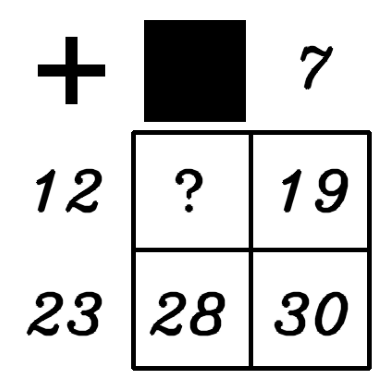

In [17]:
# 타겟 데이터 샘플
target_img_path = os.path.join(data_root_path, target_pid, 'img')
target_img_path = os.path.join(target_img_path, target_img_name)
question, option, GT = target_puzzle_info['Question'], target_puzzle_info['Option'], target_puzzle_info['Answer']
print(target_img_name)
print(target_img_path)
print(question)
print(option)
print('GT:',GT)
img_show(target_img_path)

In [6]:
# Prompt 예시 
question_dict = get_v_cot_img_and_question(pid, img_root_path, question, option)
first_prompt, second_prompt, third_prompt, fourth_prompt = get_prompt_format(question_dict)
for prompt in [first_prompt, second_prompt, third_prompt, fourth_prompt]:
    exp_query = processor.apply_chat_template(prompt, add_generation_prompt=True)
    print(exp_query,'\n')

User:<image>Please return the important information in the image with a brief explanation.<end_of_utterance>
Assistant: 

User:<image>Please return the important information in the image with a brief explanation.<end_of_utterance>
Assistant: <end_of_utterance>
User:<image>Use the symbol at the top-left to make an equation to match the number at the bottom-right.<end_of_utterance>
Assistant: 

User:<image>Please return the important information in the image with a brief explanation.<end_of_utterance>
Assistant: <end_of_utterance>
User:<image>Use the symbol at the top-left to make an equation to match the number at the bottom-right.<end_of_utterance>
Assistant: <end_of_utterance>
User:<image>Similarly, to match the numbers at the bottom-right, use the symbols at the top-left to calculate the numbers that will fit in the black square at the top-right.<end_of_utterance>
Assistant: 

User:<image>Please return the important information in the image with a brief explanation.<end_of_utterance>

In [7]:
# Visual Chain-of-Thought 본문
print('Pretrained Inference\n')

# First Turn
exp_query1 = processor.apply_chat_template(first_prompt, add_generation_prompt=True)
inputs1 = processor(text=exp_query1, images=[question_dict['I1']], return_tensors="pt").to(pretrained_device)
with torch.no_grad():    
    exp1_pred_id = pretrained_model.generate(**inputs1, max_new_tokens=200)
    exp1_pred = processor.batch_decode(exp1_pred_id, skip_special_tokens=True)
    first_turn_answer = exp1_pred[0].split('\nAssistant: ')[-1]
    print(f'First Turn answer: {first_turn_answer}')

# Second Turn
second_prompt[1]['content'][0]['text'] += first_turn_answer
exp_query2 = processor.apply_chat_template(second_prompt, add_generation_prompt=True)
inputs2 = processor(text=exp_query2, images=[question_dict['I1'], question_dict['I2']], return_tensors="pt").to(pretrained_device)
with torch.no_grad():    
    exp2_pred_id = pretrained_model.generate(**inputs2, max_new_tokens=200)
    exp2_pred = processor.batch_decode(exp2_pred_id, skip_special_tokens=True)
    second_turn_answer = exp2_pred[0].split('\nAssistant: ')[-1]
    print(f'Second Turn answer: {second_turn_answer}')

# Third Turn
third_prompt[1]['content'][0]['text'] += first_turn_answer
third_prompt[3]['content'][0]['text'] += second_turn_answer
exp_query3 = processor.apply_chat_template(third_prompt, add_generation_prompt=True)
inputs3 = processor(text=exp_query3, images=[question_dict['I1'], question_dict['I2'], question_dict['I3']], return_tensors="pt").to(pretrained_device)
with torch.no_grad():    
    exp3_pred_id = pretrained_model.generate(**inputs3, max_new_tokens=200)
    exp3_pred = processor.batch_decode(exp3_pred_id, skip_special_tokens=True)
    third_turn_answer = exp3_pred[0].split('\nAssistant: ')[-1]
    print(f'Third Turn answer: {third_turn_answer}')
    
# Fourth Turn
fourth_prompt[1]['content'][0]['text'] += first_turn_answer
fourth_prompt[3]['content'][0]['text'] += second_turn_answer
fourth_prompt[5]['content'][0]['text'] += third_turn_answer
exp_query4 = processor.apply_chat_template(fourth_prompt, add_generation_prompt=True)
inputs4 = processor(text=exp_query4, images=[question_dict['I1'], question_dict['I2'], question_dict['I3'], question_dict['I4']], return_tensors="pt").to(pretrained_device)
with torch.no_grad():    
    exp4_pred_id = pretrained_model.generate(**inputs4, max_new_tokens=200)
    exp4_pred = processor.batch_decode(exp4_pred_id, skip_special_tokens=True)
    fourth_turn_answer = exp4_pred[0].split('\nAssistant: ')[-1]
    print(f'Fourth Turn answer: {fourth_turn_answer}')

overall_prompt = fourth_prompt
print('Overall Prompt')
overall_prompt

Pretrained Inference

First Turn answer: 23 + 28 = 51
51 - 7 = 44
44 - 19 = 25
25 + 7 = 32
32 - 23 = 9
Therefore, the final answer is 9
Second Turn answer: +
Third Turn answer: +
Fourth Turn answer: The answer is D
Overall Prompt


[{'role': 'user',
  'content': [{'type': 'image'},
   {'type': 'text',
    'text': 'Please return the important information in the image with a brief explanation.'}]},
 {'role': 'assistant',
  'content': [{'type': 'text',
    'text': '23 + 28 = 51\n51 - 7 = 44\n44 - 19 = 25\n25 + 7 = 32\n32 - 23 = 9\nTherefore, the final answer is 9'}]},
 {'role': 'user',
  'content': [{'type': 'image'},
   {'type': 'text',
    'text': 'Use the symbol at the top-left to make an equation to match the number at the bottom-right.'}]},
 {'role': 'assistant', 'content': [{'type': 'text', 'text': '+'}]},
 {'role': 'user',
  'content': [{'type': 'image'},
   {'type': 'text',
    'text': 'Similarly, to match the numbers at the bottom-right, use the symbols at the top-left to calculate the numbers that will fit in the black square at the top-right.'}]},
 {'role': 'assistant', 'content': [{'type': 'text', 'text': '+'}]},
 {'role': 'user',
  'content': [{'type': 'image'},
   {'type': 'text',
    'text': 'Refer to

In [8]:
# Visual Chain-of-Thought 본문
print('Ours Inference\n')

# First Turn
exp_query1 = processor.apply_chat_template(first_prompt, add_generation_prompt=True)
inputs1 = processor(text=exp_query1, images=[question_dict['I1']], return_tensors="pt").to(ours_device)
with torch.no_grad():    
    exp1_pred_id = our_model.generate(**inputs1, max_new_tokens=200)
    exp1_pred = processor.batch_decode(exp1_pred_id, skip_special_tokens=True)
    first_turn_answer = exp1_pred[0].split('\nAssistant: ')[-1]
    # first_turn_answer = "There are, ball, mailboxs, umbrellas"
    print(f'First Turn answer: {first_turn_answer}')

# Second Turn
second_prompt[1]['content'][0]['text'] += first_turn_answer
exp_query2 = processor.apply_chat_template(second_prompt, add_generation_prompt=True)
inputs2 = processor(text=exp_query2, images=[question_dict['I1'], question_dict['I2']], return_tensors="pt").to(ours_device)
with torch.no_grad():    
    exp2_pred_id = our_model.generate(**inputs2, max_new_tokens=200)
    exp2_pred = processor.batch_decode(exp2_pred_id, skip_special_tokens=True)
    second_turn_answer = exp2_pred[0].split('\nAssistant: ')[-1]
    print(f'Second Turn answer: {second_turn_answer}')

# Third Turn
third_prompt[1]['content'][0]['text'] += first_turn_answer
third_prompt[3]['content'][0]['text'] += second_turn_answer
exp_query3 = processor.apply_chat_template(third_prompt, add_generation_prompt=True)
inputs3 = processor(text=exp_query3, images=[question_dict['I1'], question_dict['I2'], question_dict['I3']], return_tensors="pt").to(ours_device)
with torch.no_grad():    
    exp3_pred_id = our_model.generate(**inputs3, max_new_tokens=200)
    exp3_pred = processor.batch_decode(exp3_pred_id, skip_special_tokens=True)
    third_turn_answer = exp3_pred[0].split('\nAssistant: ')[-1]
    print(f'Third Turn answer: {third_turn_answer}')
    
# Fourth Turn
fourth_prompt[1]['content'][0]['text'] += first_turn_answer
fourth_prompt[3]['content'][0]['text'] += second_turn_answer
fourth_prompt[5]['content'][0]['text'] += third_turn_answer
exp_query4 = processor.apply_chat_template(fourth_prompt, add_generation_prompt=True)
inputs4 = processor(text=exp_query4, images=[question_dict['I1'], question_dict['I2'], question_dict['I3'], question_dict['I4']], return_tensors="pt").to(ours_device)
with torch.no_grad():    
    exp4_pred_id = our_model.generate(**inputs4, max_new_tokens=200)
    exp4_pred = processor.batch_decode(exp4_pred_id, skip_special_tokens=True)
    fourth_turn_answer = exp4_pred[0].split('\nAssistant: ')[-1]
    print(f'Fourth Turn answer: {fourth_turn_answer}')

overall_prompt = fourth_prompt
print('Overall Prompt')
overall_prompt

Ours Inference

First Turn answer: Important information: 19 + 28 = 47, 47 - 23 = 24, 24 * 7 = 168, 168 - 30 = 138. Therefore, 138 is the correct answer. Explanation: To solve the problem, we have to know how many more than 23 we need to make 12. The number in the square is 19, so we have to know how many more than 19 we need to make 12. If we subtract 19 from 12, we get -7, but the number in the square is 7, so we have to know how many more than 7 we need to make 12. If we subtract 7 from 12, we get 5, so the number we have to make 12 is 12 +
Second Turn answer: Answer: 12 + 7 = 19, 19 - 12 = 7, 7 + 12 = 19. Therefore, the correct answer is 19.
Third Turn answer: Answer: 12 + 28 = 40, 40 - 12 = 28, 28 + 12 = 40. Therefore, the correct answer is 40.
Fourth Turn answer: Answer: C, To solve the problem, we have to know what number is covered by the question mark. If we add the numbers in the two squares according to the pattern shown in the table, we get 12 + 28 = 40, 40 - 12 = 28, 28 + 

[{'role': 'user',
  'content': [{'type': 'image'},
   {'type': 'text',
    'text': 'Please return the important information in the image with a brief explanation.'}]},
 {'role': 'assistant',
  'content': [{'type': 'text',
    'text': '23 + 28 = 51\n51 - 7 = 44\n44 - 19 = 25\n25 + 7 = 32\n32 - 23 = 9\nTherefore, the final answer is 9Important information: 19 + 28 = 47, 47 - 23 = 24, 24 * 7 = 168, 168 - 30 = 138. Therefore, 138 is the correct answer. Explanation: To solve the problem, we have to know how many more than 23 we need to make 12. The number in the square is 19, so we have to know how many more than 19 we need to make 12. If we subtract 19 from 12, we get -7, but the number in the square is 7, so we have to know how many more than 7 we need to make 12. If we subtract 7 from 12, we get 5, so the number we have to make 12 is 12 +'}]},
 {'role': 'user',
  'content': [{'type': 'image'},
   {'type': 'text',
    'text': 'Use the symbol at the top-left to make an equation to match th